In [15]:
from metric_learn import Covariance
from visiprog.data import read_VSP_label, read_material_label, read_raw_feature
from visiprog.metric_learn import *
from visiprog.evaluate import *
%matplotlib inline
import numpy as np
from visiprog.metric_learn.fda_visiprog import LFDA_VISIPROG

from IPython.display import Image, display

np.set_printoptions(precision=2)

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
raw_feature = read_raw_feature()
print(raw_feature.shape)
material_label = read_material_label()

(5245, 82)


# Baseline approach
STSIM-M approach, no training

In [3]:
# cov = Covariance()
# cov.fit(raw_feature)
# X_STSIMM = cov.transform(raw_feature)

In [4]:
# np.savetxt('STSIM_M.csv', M, fmt='%.2f', delimiter=',')
# res = leave_one_sample_out(X_STSIMM)
# print(res['accuracy'])

# Fisher linear discriminant approach

Exact solution, however trained with semantic labels ...

In [5]:
model = LFDA()
model.fit(raw_feature, material_label)
X_fisher = model.transform(raw_feature)

In [6]:
# np.savetxt('FDA_semantic.csv', M, fmt='%.2f', delimiter=',')
res_fda = leave_one_sample_out(X_fisher, material_label)
print(res_fda['accuracy'])

0.989513822688


In [7]:
n_list = range(10,350,10)

In [8]:
representative = []

for n in n_list:
    km = KMeans(n_clusters = n, init='k-means++')
    km.fit(X_fisher)

    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_fisher)

    representative_label = [material_label[closest[i]] for i in km.labels_]
    representative_label = np.array(representative_label)

    representative.append(np.mean(representative_label == material_label))

# Train using ViSiProg label

In [9]:
groups, _ = read_VSP_label(pappas_only=False)

In [10]:
N = raw_feature.shape[0]
visiprog_label = np.zeros((N,))

count = 0
for g in groups:
    label = False
    
    # check whether any entry in the group has been labelled yet
    # if yes, then merge with that existing label
    for i in g:
        if visiprog_label[i] != 0:
            label = visiprog_label[i]
            break
    
    # if no, then create a new label
    if label == False:
        count += 1
        label = count
        
    for i in g:
        visiprog_label[i] = label


In [11]:
model = LFDA_VISIPROG()
model.fit(raw_feature, visiprog_label)
X_vsp = model.transform(raw_feature)

In [12]:
res_vsp = leave_one_sample_out(X_vsp, material_label)
print(res_vsp['accuracy'])

0.99180171592


In [13]:
representative_VSP = []

for n in n_list:
    km = KMeans(n_clusters = n, init='k-means++')
    km.fit(X_fisher)

    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_fisher)

    representative_label = [material_label[closest[i]] for i in km.labels_]
    representative_label = np.array(representative_label)

    representative_VSP.append(np.mean(representative_label == material_label))

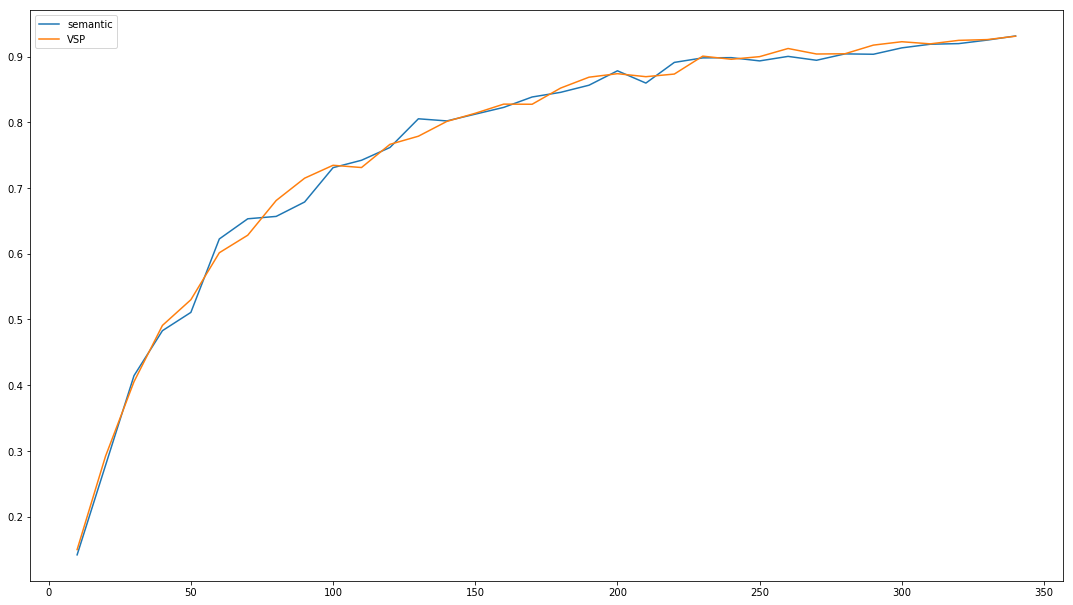

In [14]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(n_list,representative, label='semantic')
plt.plot(n_list,representative_VSP, label='VSP')
plt.legend()